Importacoes para o random florest

In [243]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np
from scipy.interpolate import interp1d
from statistics import mean
from sklearn.metrics import average_precision_score


Carregando dos dados - 2000

In [244]:
# Carregando base de dados pré-processada
df = pd.read_csv('C:/Users/Hugo/machine-learning-water-quality/notebook/output/adasyn.csv')
#df = pd.read_csv('C:/Users/Hugo/machine-learning-water-quality/notebook/output/smote.csv')
#df = pd.read_csv('C:/Users/Hugo/machine-learning-water-quality/notebook/output/amostra_por_classificador.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)
print(df.columns)

# A variável X determina o conjunto de atributos sem o rótulo
X = df.drop('WQI', axis=1)

# O Y são os rótulos contendo a classificação do WQI
y = df['WQI']

Index(['Dissolved oxygen', 'pH', 'Conductivity', 'Nitrate', 'Fecal coliform',
       'Total coliform', 'Biological oxygen demand', 'WQI'],
      dtype='object')


treinamento

In [245]:
# Divisão de dados testes e de treinamento relacionado ao X e Y, de forma a garantir relação entre os mesmos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Instanciando o modelo
model = RandomForestClassifier(n_estimators=100, criterion="gini", random_state=42)

# Treinando o modelo
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Previsoes

In [246]:
# Previsões
y_pred = model.predict(X_test)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize

# Fazendo as previsõesde probabilidade de resultados
y_pred_proba = model.predict_proba(X_test)


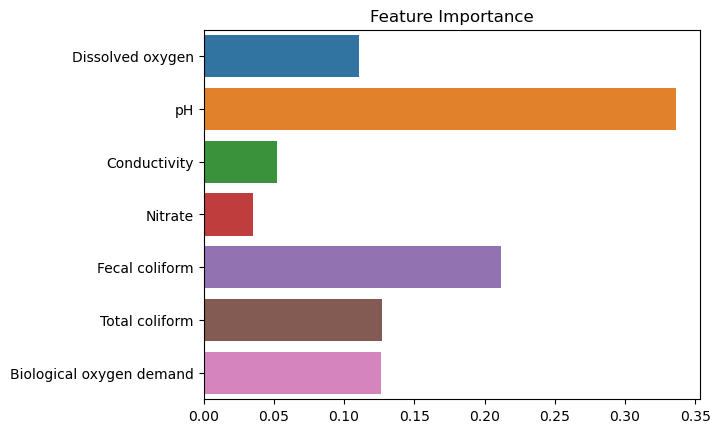

In [247]:
# # Importância dos atributos para resultado
feature_importances = model.feature_importances_
sns.barplot(x=feature_importances, y=X.columns)
plt.title("Feature Importance")
plt.show()

              precision    recall  f1-score   support

           1     1.0000    1.0000    1.0000       620
           2     0.9952    1.0000    0.9976       622
           3     0.9733    0.9791    0.9762       670
           4     0.9824    0.9716    0.9770       633

    accuracy                         0.9874      2545
   macro avg     0.9877    0.9877    0.9877      2545
weighted avg     0.9874    0.9874    0.9874      2545

AP SCORE
0.998888400052811

Média das profundidades:  20.04

 ROC


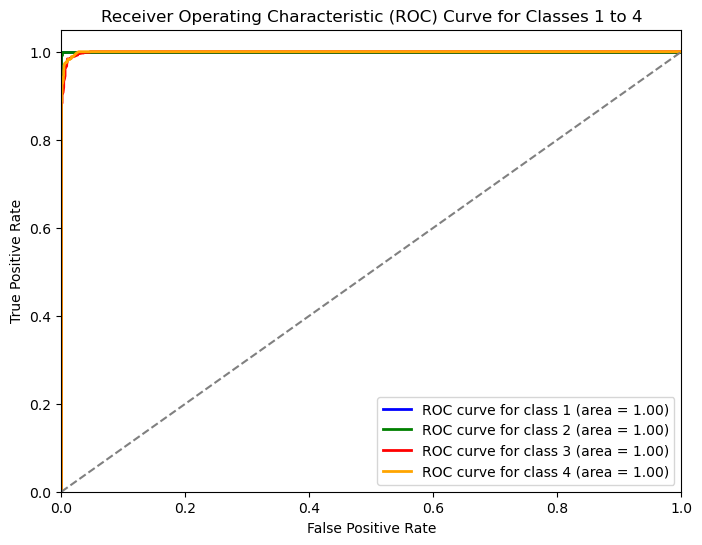


Confusion Matrix


<Axes: >

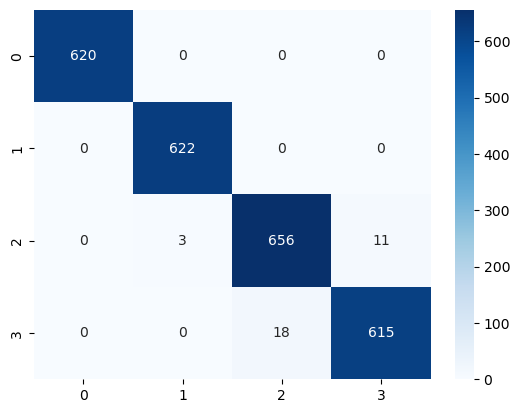

In [248]:
# # Avaliação do modelo
print(classification_report(y_test, y_pred, digits=4))

# # Average Precision Score
apScore = average_precision_score(y_test, y_pred_proba)
print("AP SCORE")
print(apScore)

# # Profundidade máxima média
profundidades = [estimator.tree_.max_depth for estimator in model.estimators_]
# print("As profundidades das árvores na floresta são:", profundidades)
print("\nMédia das profundidades: ", mean(profundidades))

# Binarizando os rótulos para a abordagem one-vs-rest
y_test_bin = label_binarize(y_test, classes=[1, 2, 3, 4])
n_classes = y_test_bin.shape[1]

print('\n ROC')
# Calculando ROC e AUC para cada classe
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotando as curvas ROC para cada classe
plt.figure(figsize=(8, 6))
colors = ['blue', 'green', 'red', 'orange']  # Uma cor para cada classe

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve for class {i+1} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Classes 1 to 4')
plt.legend(loc="lower right")
plt.show()

# # Confusion Matrix
confusionMatrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix")
sns.heatmap(confusionMatrix, annot=True, fmt="d", cmap="Blues")